<a href="https://colab.research.google.com/github/ajaysanthoshb/FYP/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import pandas as pd

# Audio
import librosa
import librosa.display

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [58]:
!pip install tqdm
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd

# scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight
import scikitplot as skplt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Keras
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from keras.utils import to_categorical

# Audio
import librosa 
import librosa.display

#Plot
import matplotlib.pyplot as plt

# Utility
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools

In [66]:
dataset = []
for folder in ["/content/drive/MyDrive/heartbeat-sounds/set_a/**","/content/drive/MyDrive/heartbeat-sounds/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
            duration = librosa.get_duration(filename=filename)
            # skip audio smaller than 3 secs
            if duration>=3:
                slice_size = 3
                iterations = int((duration-slice_size)/(slice_size-1))
                iterations += 1
                initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
                if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                    for i in range(iterations):
                        offset = initial_offset + i*(slice_size-1)
                        if duration == 9:
                          print(offset,i)
                        dataset.append({
                                "filename": filename,
                                "label": label,
                                "offset": offset
                            })
                       
                        
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()

0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 2
6.0 3
0.0 0
2.0 1
4.0 

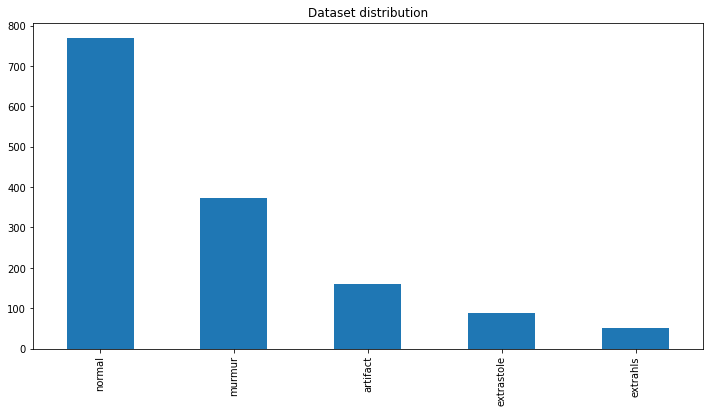

(None, 1441)

In [61]:
plt.figure(figsize=(12,6))
dataset.label.value_counts().plot(kind='bar', title='Dataset distribution')
plt.show(),len(dataset)

In [62]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 1152
Test: 289


In [63]:
visited = False
def extract_features(audio_path,offset):
    global visited
    y, sr = librosa.load(audio_path, offset=offset, duration=3)  
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, 
                                   hop_length=512, 
                                   n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    if not visited:
      print(S.shape,mfccs.shape)
      visited = True
    return mfccs

In [64]:
x_train = []
x_test = []

for idx in tqdm(range(len(train))):
    x_train.append(extract_features(train.filename.iloc[idx],train.offset.iloc[idx]))

for idx in tqdm(range(len(test))):
    x_test.append(extract_features(test.filename.iloc[idx],test.offset.iloc[idx]))
    
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

print("X train:", x_train.shape)
print("X test:", x_test.shape)

  0%|          | 1/1152 [00:00<13:27,  1.43it/s]

(128, 130) (40, 130)


100%|██████████| 289/289 [00:51<00:00,  5.57it/s]

X train: (1152, 40, 130)
X test: (289, 40, 130)


In [67]:
# Encode Labels
encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(y_train),
                                        y = y_train )

In [68]:
from tensorflow.keras.utils import to_categorical

x_train_CNN = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test_CNN = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

X train: (1152, 40, 130)
Y train: (1152, 5)
X test: (289, 40, 130)
Y test: (289, 5)


In [75]:
print(x_train_CNN.shape)

(1152, 40, 130, 1)


In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 129, 32)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 63, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 31, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 31, 64)         0

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=300
MAX_BATCH=32

best_model_file = '/content/drive/MyDrive/heartbeat-sounds/CNN2'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=model.fit(x_train_CNN, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_test_CNN, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 4.22028, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 2: loss improved from 4.22028 to 1.30703, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 3: loss improved from 1.30703 to 1.02286, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 4: loss improved from 1.02286 to 0.90530, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 5: loss improved from 0.90530 to 0.87709, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 6: loss improved from 0.87709 to 0.85282, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 7: loss improved from 0.85282 to 0.79128, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 8: loss improved from 0.79128 to 0.78972, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 9: loss improved from 0.78972 to 0.74957, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 10: loss improved from 0.74957 to 0.73034, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 11: loss improved from 0.73034 to 0.71625, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 12: loss improved from 0.71625 to 0.71576, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 13: loss improved from 0.71576 to 0.70239, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 14: loss improved from 0.70239 to 0.69192, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 15: loss did not improve from 0.69192

Epoch 16: loss improved from 0.69192 to 0.68070, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 17: loss improved from 0.68070 to 0.67180, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 18: loss improved from 0.67180 to 0.65874, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 19: loss did not improve from 0.65874

Epoch 20: loss did not improve from 0.65874

Epoch 21: loss improved from 0.65874 to 0.63346, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 22: loss did not improve from 0.63346

Epoch 23: loss did not improve from 0.63346

Epoch 24: loss improved from 0.63346 to 0.62603, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 25: loss did not improve from 0.62603

Epoch 26: loss improved from 0.62603 to 0.62220, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 27: loss improved from 0.62220 to 0.61823, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 28: loss improved from 0.61823 to 0.59666, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 29: loss did not improve from 0.59666

Epoch 30: loss did not improve from 0.59666

Epoch 31: loss improved from 0.59666 to 0.58356, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 32: loss did not improve from 0.58356

Epoch 33: loss improved from 0.58356 to 0.57908, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 34: loss improved from 0.57908 to 0.57817, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 35: loss improved from 0.57817 to 0.56848, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 36: loss did not improve from 0.56848

Epoch 37: loss improved from 0.56848 to 0.55115, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 38: loss did not improve from 0.55115

Epoch 39: loss did not improve from 0.55115

Epoch 40: loss did not improve from 0.55115

Epoch 41: loss did not improve from 0.55115

Epoch 42: loss did not improve from 0.55115

Epoch 43: loss did not improve from 0.55115

Epoch 44: loss improved from 0.55115 to 0.54934, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 45: loss did not improve from 0.54934

Epoch 46: loss improved from 0.54934 to 0.52292, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 47: loss improved from 0.52292 to 0.52129, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 48: loss improved from 0.52129 to 0.51643, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 49: loss improved from 0.51643 to 0.51312, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 50: loss did not improve from 0.51312

Epoch 51: loss improved from 0.51312 to 0.50087, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 52: loss did not improve from 0.50087

Epoch 53: loss improved from 0.50087 to 0.48278, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 54: loss did not improve from 0.48278

Epoch 55: loss did not improve from 0.48278

Epoch 56: loss did not improve from 0.48278

Epoch 57: loss did not improve from 0.48278

Epoch 58: loss did not improve from 0.48278

Epoch 59: loss improved from 0.48278 to 0.47852, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 60: loss did not improve from 0.47852

Epoch 61: loss did not improve from 0.47852

Epoch 62: loss did not improve from 0.47852

Epoch 63: loss improved from 0.47852 to 0.46767, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 64: loss improved from 0.46767 to 0.45677, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 65: loss did not improve from 0.45677

Epoch 66: loss improved from 0.45677 to 0.43140, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 67: loss did not improve from 0.43140

Epoch 68: loss did not improve from 0.43140

Epoch 69: loss did not improve from 0.43140

Epoch 70: loss did not improve from 0.43140

Epoch 71: loss improved from 0.43140 to 0.42091, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 72: loss did not improve from 0.42091

Epoch 73: loss did not improve from 0.42091

Epoch 74: loss did not improve from 0.42091

Epoch 75: loss improved from 0.42091 to 0.40170, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 76: loss did not improve from 0.40170

Epoch 77: loss did not improve from 0.40170

Epoch 78: loss improved from 0.40170 to 0.39279, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 79: loss did not improve from 0.39279

Epoch 80: loss did not improve from 0.39279

Epoch 81: loss did not improve from 0.39279

Epoch 82: loss did not improve from 0.39279

Epoch 83: loss did not improve from 0.39279

Epoch 84: loss did not improve from 0.39279

Epoch 85: loss improved from 0.39279 to 0.37233, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 86: loss did not improve from 0.37233

Epoch 87: loss improved from 0.37233 to 0.36983, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 88: loss improved from 0.36983 to 0.36907, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 89: loss improved from 0.36907 to 0.36493, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 90: loss improved from 0.36493 to 0.35693, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 91: loss did not improve from 0.35693

Epoch 92: loss did not improve from 0.35693

Epoch 93: loss did not improve from 0.35693

Epoch 94: loss did not improve from 0.35693

Epoch 95: loss did not improve from 0.35693

Epoch 96: loss improved from 0.35693 to 0.35145, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 97: loss did not improve from 0.35145

Epoch 98: loss improved from 0.35145 to 0.32837, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 99: loss improved from 0.32837 to 0.32792, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 100: loss did not improve from 0.32792

Epoch 101: loss improved from 0.32792 to 0.32606, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 102: loss did not improve from 0.32606

Epoch 103: loss did not improve from 0.32606

Epoch 104: loss did not improve from 0.32606

Epoch 105: loss improved from 0.32606 to 0.32172, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 106: loss improved from 0.32172 to 0.32095, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 107: loss improved from 0.32095 to 0.31786, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 108: loss improved from 0.31786 to 0.29198, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 109: loss did not improve from 0.29198

Epoch 110: loss improved from 0.29198 to 0.28184, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 111: loss did not improve from 0.28184

Epoch 112: loss did not improve from 0.28184

Epoch 113: loss did not improve from 0.28184

Epoch 114: loss did not improve from 0.28184

Epoch 115: loss improved from 0.28184 to 0.28145, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 116: loss did not improve from 0.28145

Epoch 117: loss did not improve from 0.28145

Epoch 118: loss improved from 0.28145 to 0.26921, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 119: loss improved from 0.26921 to 0.26647, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 120: loss did not improve from 0.26647

Epoch 121: loss did not improve from 0.26647

Epoch 122: loss did not improve from 0.26647

Epoch 123: loss did not improve from 0.26647

Epoch 124: loss did not improve from 0.26647

Epoch 125: loss improved from 0.26647 to 0.25576, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 126: loss did not improve from 0.25576

Epoch 127: loss improved from 0.25576 to 0.25003, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 128: loss improved from 0.25003 to 0.24053, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 129: loss did not improve from 0.24053

Epoch 130: loss improved from 0.24053 to 0.22737, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 131: loss improved from 0.22737 to 0.22497, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 132: loss did not improve from 0.22497

Epoch 133: loss did not improve from 0.22497

Epoch 134: loss did not improve from 0.22497

Epoch 135: loss did not improve from 0.22497

Epoch 136: loss did not improve from 0.22497

Epoch 137: loss did not improve from 0.22497

Epoch 138: loss improved from 0.22497 to 0.21577, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 139: loss did not improve from 0.21577

Epoch 140: loss did not improve from 0.21577

Epoch 141: loss did not improve from 0.21577

Epoch 142: loss improved from 0.21577 to 0.20810, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 143: loss did not improve from 0.20810

Epoch 144: loss improved from 0.20810 to 0.18885, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 145: loss did not improve from 0.18885

Epoch 146: loss did not improve from 0.18885

Epoch 147: loss did not improve from 0.18885

Epoch 148: loss did not improve from 0.18885

Epoch 149: loss did not improve from 0.18885

Epoch 150: loss did not improve from 0.18885

Epoch 151: loss did not improve from 0.18885

Epoch 152: loss did not improve from 0.18885

Epoch 153: loss improved from 0.18885 to 0.17862, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 154: loss did not improve from 0.17862

Epoch 155: loss did not improve from 0.17862

Epoch 156: loss did not improve from 0.17862

Epoch 157: loss improved from 0.17862 to 0.17668, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 158: loss did not improve from 0.17668

Epoch 159: loss improved from 0.17668 to 0.17315, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 160: loss did not improve from 0.17315

Epoch 161: loss improved from 0.17315 to 0.16993, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 162: loss did not improve from 0.16993

Epoch 163: loss improved from 0.16993 to 0.15066, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 164: loss did not improve from 0.15066

Epoch 165: loss did not improve from 0.15066

Epoch 166: loss did not improve from 0.15066

Epoch 167: loss did not improve from 0.15066

Epoch 168: loss did not improve from 0.15066

Epoch 169: loss did not improve from 0.15066

Epoch 170: loss did not improve from 0.15066

Epoch 171: loss did not improve from 0.15066

Epoch 172: loss improved from 0.15066 to 0.13398, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 173: loss improved from 0.13398 to 0.12569, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 174: loss did not improve from 0.12569

Epoch 175: loss did not improve from 0.12569

Epoch 176: loss did not improve from 0.12569

Epoch 177: loss did not improve from 0.12569

Epoch 178: loss did not improve from 0.12569

Epoch 179: loss did not improve from 0.12569

Epoch 180: loss did not improve from 0.12569

Epoch 181: loss did not improve from 0.12569

Epoch 182: loss did not improve from 0.12569

Epoch 183: loss did not improve from 0.12569

Epoch 184: loss did not improve from 0.12569

Epoch 185: loss did not improve from 0.12569

Epoch 186: loss improved from 0.12569 to 0.12384, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 187: loss did not improve from 0.12384

Epoch 188: loss did not improve from 0.12384

Epoch 189: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 189: loss improved from 0.12384 to 0.11914, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 190: loss improved from 0.11914 to 0.11304, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 191: loss improved from 0.11304 to 0.10260, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 192: loss did not improve from 0.10260

Epoch 193: loss improved from 0.10260 to 0.09740, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 194: loss did not improve from 0.09740

Epoch 195: loss did not improve from 0.09740

Epoch 196: loss did not improve from 0.09740

Epoch 197: loss did not improve from 0.09740

Epoch 198: loss improved from 0.09740 to 0.09055, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 199: loss did not improve from 0.09055

Epoch 200: loss did not improve from 0.09055

Epoch 201: loss did not improve from 0.09055

Epoch 202: loss did not improve from 0.09055

Epoch 203: loss improved from 0.09055 to 0.09029, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 204: loss did not improve from 0.09029

Epoch 205: loss did not improve from 0.09029

Epoch 206: loss improved from 0.09029 to 0.08476, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 207: loss did not improve from 0.08476

Epoch 208: loss did not improve from 0.08476

Epoch 209: loss did not improve from 0.08476

Epoch 210: loss did not improve from 0.08476

Epoch 211: loss did not improve from 0.08476

Epoch 212: loss did not improve from 0.08476

Epoch 213: loss improved from 0.08476 to 0.08262, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 214: loss did not improve from 0.08262

Epoch 215: loss did not improve from 0.08262

Epoch 216: loss did not improve from 0.08262

Epoch 217: loss did not improve from 0.08262

Epoch 218: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 218: loss did not improve from 0.08262

Epoch 219: loss did not improve from 0.08262

Epoch 220: loss did not improve from 0.08262

Epoch 221: loss did not improve from 0.08262

Epoch 222: loss did not improve from 0.08262

Epoch 223: loss improved from 0.08262 to 0.08081, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 224: loss did not improve from 0.08081

Epoch 225: loss improved from 0.08081 to 0.08037, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 226: loss did not improve from 0.08037

Epoch 227: loss improved from 0.08037 to 0.07371, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 228: loss did not improve from 0.07371

Epoch 229: loss did not improve from 0.07371

Epoch 230: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 230: loss did not improve from 0.07371

Epoch 231: loss did not improve from 0.07371

Epoch 232: loss did not improve from 0.07371

Epoch 233: loss did not improve from 0.07371

Epoch 234: loss did not improve from 0.07371

Epoch 235: loss did not improve from 0.07371

Epoch 236: loss did not improve from 0.07371

Epoch 237: loss did not improve from 0.07371

Epoch 238: loss did not improve from 0.07371

Epoch 239: loss did not improve from 0.07371

Epoch 240: loss did not improve from 0.07371

Epoch 241: loss did not improve from 0.07371

Epoch 242: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 242: loss did not improve from 0.07371

Epoch 243: loss did not improve from 0.07371

Epoch 244: loss did not improve from 0.07371

Epoch 245: loss did not improve from 0.07371

Epoch 246: 


Epoch 288: loss did not improve from 0.07041

Epoch 289: loss did not improve from 0.07041

Epoch 290: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.

Epoch 290: loss did not improve from 0.07041

Epoch 291: loss did not improve from 0.07041

Epoch 292: loss did not improve from 0.07041

Epoch 293: loss did not improve from 0.07041

Epoch 294: loss did not improve from 0.07041

Epoch 295: loss did not improve from 0.07041

Epoch 296: loss did not improve from 0.07041

Epoch 297: loss did not improve from 0.07041

Epoch 298: loss did not improve from 0.07041

Epoch 299: loss did not improve from 0.07041

Epoch 300: loss did not improve from 0.07041


In [24]:
def drawTrainLossCurves(history):
  # Loss curves
  plt.figure(figsize=[12,8])
  plt.subplot(2,1,1)
  plt.plot(history.history['loss'], 'r', linewidth=3.0)
  plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # accuracy curves
  plt.figure(figsize=[14,10])
  plt.subplot(2,1,2)
  plt.plot(history.history['acc'], 'r', linewidth=3.0)
  plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
  plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)
  plt.show()

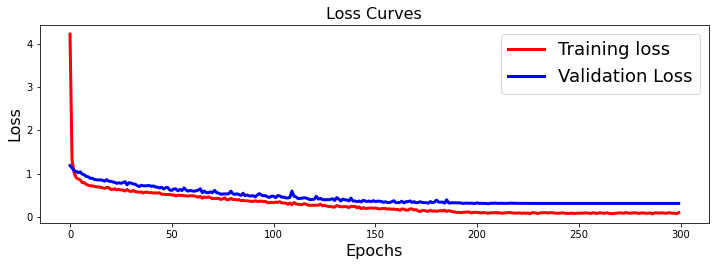

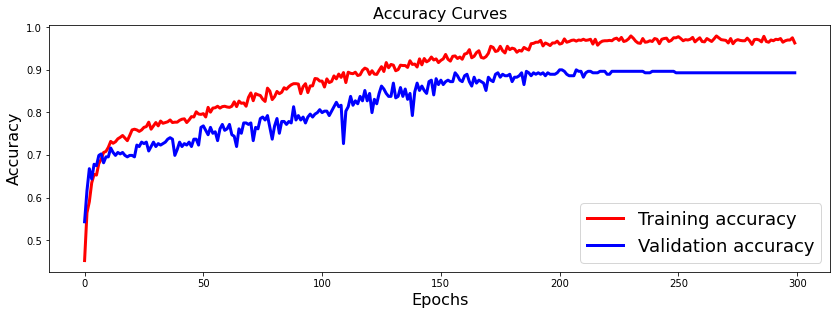

In [25]:
drawTrainLossCurves(history)

In [40]:
import tensorflow as tf
loadedCNNModel = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN2')
predictions = loadedCNNModel.predict(x_test_CNN, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    artifact       1.00      0.94      0.97        35
    extrahls       0.92      0.75      0.83        16
  extrastole       0.76      0.87      0.81        15
      murmur       0.88      0.88      0.88        86
      normal       0.89      0.91      0.90       137

    accuracy                           0.89       289
   macro avg       0.89      0.87      0.88       289
weighted avg       0.89      0.89      0.89       289



In [29]:
def performance(name,model,xtest,ytest):
  scores = model.evaluate(xtest, ytest, verbose=1)
  predictions = model.predict(xtest, verbose=1)
  if name != "":
    model.save(name)
  y_true, y_pred = [],[]
  y_trueInd,y_predInd = [],[]
  classes = encoder.classes_
  for idx, prediction in enumerate(predictions):
      y_trueInd.append(np.argmax(ytest[idx]))
      y_predInd.append(np.argmax(prediction))
      y_true.append(classes[np.argmax(ytest[idx])])
      y_pred.append(classes[np.argmax(prediction)])

  print(classification_report(y_pred, y_true))
  skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
  plt.xticks(rotation=50)
  plt.show()

10/10 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

    artifact       1.00      0.94      0.97        35
    extrahls       0.92      0.75      0.83        16
  extrastole       0.76      0.87      0.81        15
      murmur       0.88      0.88      0.88        86
      normal       0.89      0.91      0.90       137

    accuracy                           0.89       289
   macro avg       0.89      0.87      0.88       289
weighted avg       0.89      0.89      0.89       289



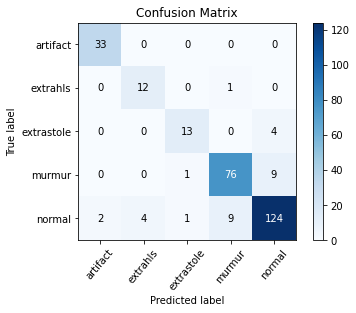

In [42]:
performance("",model,x_test_CNN,y_test)

In [47]:
dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.Input(shape=(x_train.shape[1],x_train.shape[2])))
dnn.add(tf.keras.layers.Dense(256, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(128, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(64, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(32, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(256, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(128, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(64, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(32, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(64, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(32, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(Flatten())
dnn.add(tf.keras.layers.Dense(5,activation = 'softmax'))
dnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 40, 256)           33536     
                                                                 
 dropout_12 (Dropout)        (None, 40, 256)           0         
                                                                 
 dense_12 (Dense)            (None, 40, 128)           32896     
                                                                 
 dropout_13 (Dropout)        (None, 40, 128)           0         
                                                                 
 dense_13 (Dense)            (None, 40, 64)            8256      
                                                                 
 dropout_14 (Dropout)        (None, 40, 64)            0         
                                                                 
 dense_14 (Dense)            (None, 40, 32)           

In [49]:
dnn.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=200
MAX_BATCH=32

best_model_file3 = '/content/drive/MyDrive/heartbeat-sounds/DNN2'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file3, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=dnn.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_test, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 1.32898, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 2: loss improved from 1.32898 to 1.21186, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 3: loss improved from 1.21186 to 1.17333, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 4: loss improved from 1.17333 to 1.10617, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 5: loss did not improve from 1.10617

Epoch 6: loss improved from 1.10617 to 1.03927, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 7: loss improved from 1.03927 to 1.03306, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 8: loss improved from 1.03306 to 0.97581, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 9: loss improved from 0.97581 to 0.96470, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 10: loss improved from 0.96470 to 0.94

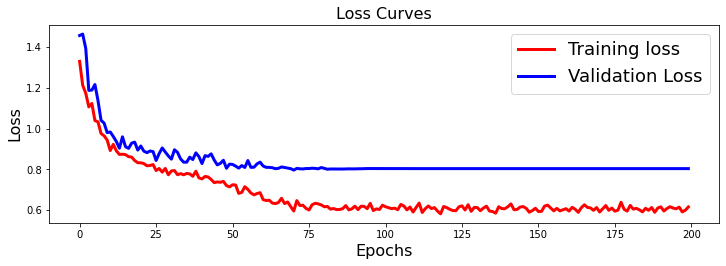

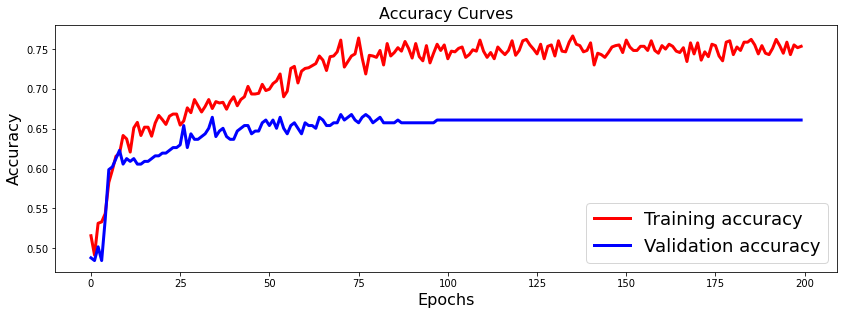

In [50]:
drawTrainLossCurves(history)

10/10 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

    artifact       0.88      0.88      0.88        33
    extrahls       0.92      0.55      0.69        22
  extrastole       0.06      1.00      0.11         1
      murmur       0.22      1.00      0.36        19
      normal       0.93      0.61      0.73       214

    accuracy                           0.66       289
   macro avg       0.60      0.81      0.55       289
weighted avg       0.87      0.66      0.72       289



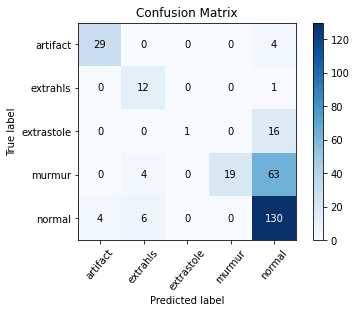

In [51]:
performance("",dnn,x_test,y_test)

In [55]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (x_train.shape[1],x_train.shape[2])))
LSTM_model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=True))
LSTM_model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
LSTM_model.add(Dense(5, activation='softmax'))
LSTM_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 40, 64)            49920     
                                                                 
 lstm_7 (LSTM)               (None, 40, 32)            12416     
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_24 (Dense)            (None, 5)                 165       
                                                                 
Total params: 70,821
Trainable params: 70,821
Non-trainable params: 0
_________________________________________________________________


In [56]:
LSTM_model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=150
MAX_BATCH=32

best_model_file2 = '/content/drive/MyDrive/heartbeat-sounds/LSTM2'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file2, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=LSTM_model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_test, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 1.35904, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 2: loss improved from 1.35904 to 1.06655, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 3: loss improved from 1.06655 to 0.94365, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 4: loss improved from 0.94365 to 0.86958, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 5: loss improved from 0.86958 to 0.79787, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 6: loss improved from 0.79787 to 0.75153, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 7: loss improved from 0.75153 to 0.69226, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 8: loss improved from 0.69226 to 0.64760, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 9: loss improved from 0.64760 to 0.59094, saving model to /content/drive/M

In [69]:
import tensorflow as tf
loadedLSTMModel = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/LSTM2')
predictions = loadedLSTMModel.predict(x_test, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

10/10 [==============================] - 1s 35ms/step
              precision    recall  f1-score   support

    artifact       0.85      0.90      0.88        31
    extrahls       0.54      0.54      0.54        13
  extrastole       0.00      0.00      0.00         3
      murmur       0.43      0.64      0.51        58
      normal       0.82      0.62      0.71       184

    accuracy                           0.65       289
   macro avg       0.53      0.54      0.53       289
weighted avg       0.72      0.65      0.67       289



In [70]:
testDataset = []
for folder in ["/content/drive/MyDrive/heartbeat-sounds/set_a/**","/content/drive/MyDrive/heartbeat-sounds/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
            duration = librosa.get_duration(filename=filename)
            # skip audio smaller than 3 secs
            if duration>=3:
                if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                      testDataset.append({
                              "filename": filename,
                              "label": label,
                          })
                       
                        
testDataset = pd.DataFrame(testDataset)
testDataset = shuffle(testDataset, random_state=25)
testDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 23 to 132
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  462 non-null    object
 1   label     462 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB


In [72]:
trainNew, testNew = train_test_split(testDataset, test_size=0.35, random_state=42)

print("Train: %i" % len(trainNew))
print("Test: %i" % len(testNew))

Train: 300
Test: 162


In [76]:
import tensorflow as tf
import librosa
from collections import defaultdict
import numpy as np

In [89]:
def eachQuantumPrediction(filepath,offset,model):
  quantum = np.asarray(extract_features(filepath,offset))
  quantum = quantum.reshape(1, quantum.shape[0], quantum.shape[1], 1)
  return np.argmax(model.predict(quantum)[0])


In [90]:
def samplePrediction(filepath, model):
  duration = librosa.get_duration(filename=filepath)
  slice_size = 3
  iterations = int((duration-slice_size)/(slice_size-1))
  iterations += 1
  initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
  maxi = -1
  maxCount = 0
  hmap = defaultdict(int)
  for i in range(iterations):
      offset = initial_offset + i*(slice_size-1)
      predNum = eachQuantumPrediction(filepath,offset,model)
      hmap[predNum] += 1
      if hmap[predNum] > maxCount:
        maxCount = hmap[predNum]
        maxi = predNum
  return maxi
  

In [94]:
def samplesPrediction(model):
  y_true, y_pred = [],[]
  classes = encoder.classes_
  for idx in tqdm(range(len(testNew))):
    y_pred.append(classes[samplePrediction(testNew.filename.iloc[idx],model)])
    y_true.append(testNew.label.iloc[idx])
  print(classification_report(y_pred, y_true))
  skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
  plt.xticks(rotation=50)
  plt.show()

  0%|          | 0/162 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 1/162 [00:00<01:03,  2.53it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 2/162 [00:01<01:30,  1.76it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 3/162 [00:01<01:01,  2.60it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 4/162 [00:01<01:11,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 5/162 [00:02<01:34,  1.66it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 6/162 [00:02<01:11,  2.19it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 7/162 [00:03<01:26,  1.79it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 8/162 [00:04<01:40,  1.54it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 9/162 [00:04<01:33,  1.64it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 10/162 [00:05<01:37,  1.57it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 11/162 [00:06<01:38,  1.53it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 12/162 [00:07<01:47,  1.40it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 13/162 [00:07<01:44,  1.42it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 14/162 [00:08<01:40,  1.48it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 15/162 [00:09<01:36,  1.53it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 16/162 [00:09<01:44,  1.39it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 17/162 [00:11<01:59,  1.22it/s]

1/1 [==============================] - 0s 62ms/step


 11%|█         | 18/162 [00:12<02:12,  1.09it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 19/162 [00:13<02:08,  1.11it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 20/162 [00:14<02:19,  1.02it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 21/162 [00:15<02:32,  1.08s/it]

1/1 [==============================] - 0s 30ms/step


 14%|█▎        | 22/162 [00:16<02:08,  1.09it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 23/162 [00:16<01:36,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 24/162 [00:16<01:14,  1.84it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 25/162 [00:17<01:42,  1.34it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 26/162 [00:19<02:08,  1.06it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 27/162 [00:19<01:36,  1.40it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 28/162 [00:20<01:47,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 29/162 [00:20<01:42,  1.30it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▊        | 30/162 [00:21<01:45,  1.25it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 31/162 [00:22<01:41,  1.29it/s]

1/1 [==============================] - 0s 38ms/step


 20%|█▉        | 32/162 [00:23<02:01,  1.07it/s]

1/1 [==============================] - 0s 63ms/step


 20%|██        | 33/162 [00:25<02:26,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 34/162 [00:26<02:18,  1.08s/it]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 35/162 [00:27<02:15,  1.07s/it]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 36/162 [00:27<01:40,  1.25it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 37/162 [00:27<01:16,  1.62it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 38/162 [00:27<00:59,  2.08it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 39/162 [00:28<01:13,  1.68it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 40/162 [00:29<01:03,  1.93it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 41/162 [00:29<01:12,  1.67it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 42/162 [00:31<01:52,  1.07it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 43/162 [00:32<01:54,  1.04it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 44/162 [00:33<01:38,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 45/162 [00:33<01:26,  1.35it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 46/162 [00:34<01:24,  1.38it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 47/162 [00:35<01:22,  1.40it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 48/162 [00:38<02:35,  1.36s/it]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 49/162 [00:38<01:54,  1.01s/it]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 50/162 [00:39<01:59,  1.07s/it]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 51/162 [00:39<01:38,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 52/162 [00:40<01:25,  1.28it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 53/162 [00:40<01:05,  1.67it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 54/162 [00:40<00:51,  2.12it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 55/162 [00:41<00:47,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 56/162 [00:41<00:38,  2.74it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 57/162 [00:41<00:37,  2.79it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 58/162 [00:42<00:45,  2.31it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 59/162 [00:43<01:07,  1.52it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 60/162 [00:44<01:10,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 61/162 [00:44<00:59,  1.71it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 62/162 [00:45<01:03,  1.57it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 63/162 [00:45<01:00,  1.64it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 64/162 [00:46<00:58,  1.69it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 65/162 [00:47<00:59,  1.63it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 66/162 [00:47<00:46,  2.09it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████▏     | 67/162 [00:47<00:52,  1.82it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 68/162 [00:48<00:58,  1.62it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 69/162 [00:48<00:44,  2.08it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 70/162 [00:49<00:40,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 71/162 [00:49<00:33,  2.74it/s]

1/1 [==============================] - 0s 71ms/step


 44%|████▍     | 72/162 [00:50<00:40,  2.21it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 73/162 [00:50<00:35,  2.51it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 74/162 [00:51<00:47,  1.85it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▋     | 75/162 [00:52<01:09,  1.24it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 76/162 [00:53<01:12,  1.18it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 77/162 [00:58<02:43,  1.93s/it]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 78/162 [00:58<02:15,  1.62s/it]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 79/162 [00:59<01:47,  1.29s/it]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 80/162 [01:00<01:31,  1.11s/it]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 81/162 [01:00<01:17,  1.05it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 82/162 [01:01<01:11,  1.12it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 83/162 [01:01<00:54,  1.46it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 84/162 [01:02<00:53,  1.45it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 85/162 [01:02<00:41,  1.84it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 86/162 [01:04<01:14,  1.02it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▎    | 87/162 [01:04<00:59,  1.27it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████▍    | 88/162 [01:05<01:03,  1.16it/s]

1/1 [==============================] - 0s 79ms/step


 55%|█████▍    | 89/162 [01:06<00:51,  1.41it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▌    | 90/162 [01:07<01:03,  1.13it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 91/162 [01:08<01:12,  1.02s/it]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 92/162 [01:09<00:56,  1.24it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 93/162 [01:09<00:44,  1.55it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 94/162 [01:10<00:46,  1.47it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 95/162 [01:11<00:53,  1.25it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 96/162 [01:12<00:51,  1.29it/s]

1/1 [==============================] - 0s 122ms/step


 60%|█████▉    | 97/162 [01:14<01:13,  1.13s/it]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 98/162 [01:14<00:57,  1.11it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 99/162 [01:14<00:43,  1.46it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 100/162 [01:15<00:49,  1.25it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 101/162 [01:16<00:44,  1.36it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 102/162 [01:16<00:33,  1.77it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▎   | 103/162 [01:16<00:26,  2.20it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 104/162 [01:17<00:31,  1.82it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 105/162 [01:17<00:27,  2.04it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 106/162 [01:18<00:37,  1.48it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 107/162 [01:19<00:34,  1.61it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 108/162 [01:20<00:43,  1.25it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 109/162 [01:21<00:38,  1.39it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 110/162 [01:22<00:54,  1.04s/it]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 111/162 [01:23<00:39,  1.28it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 112/162 [01:23<00:37,  1.33it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 113/162 [01:24<00:43,  1.12it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 114/162 [01:25<00:32,  1.48it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 115/162 [01:25<00:27,  1.72it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 116/162 [01:26<00:30,  1.48it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 117/162 [01:26<00:25,  1.74it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 118/162 [01:26<00:20,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 119/162 [01:27<00:23,  1.84it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 120/162 [01:29<00:37,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 121/162 [01:30<00:35,  1.17it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 122/162 [01:31<00:34,  1.16it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 123/162 [01:31<00:31,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 124/162 [01:32<00:27,  1.39it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 125/162 [01:32<00:25,  1.44it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 126/162 [01:33<00:23,  1.51it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 127/162 [01:34<00:25,  1.37it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 128/162 [01:34<00:20,  1.67it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 129/162 [01:35<00:27,  1.21it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 130/162 [01:36<00:23,  1.34it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 131/162 [01:37<00:23,  1.33it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 132/162 [01:37<00:18,  1.59it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 133/162 [01:38<00:18,  1.54it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 134/162 [01:38<00:14,  1.95it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 135/162 [01:38<00:11,  2.43it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 136/162 [01:39<00:10,  2.55it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 137/162 [01:39<00:12,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 138/162 [01:39<00:09,  2.53it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 139/162 [01:40<00:08,  2.61it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 140/162 [01:41<00:13,  1.59it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 141/162 [01:42<00:12,  1.64it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 142/162 [01:42<00:13,  1.54it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 143/162 [01:43<00:11,  1.60it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 144/162 [01:43<00:10,  1.64it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 145/162 [01:44<00:10,  1.55it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 146/162 [01:45<00:09,  1.76it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 147/162 [01:45<00:09,  1.52it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 148/162 [01:47<00:12,  1.10it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 149/162 [01:48<00:12,  1.00it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 150/162 [01:49<00:13,  1.09s/it]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 151/162 [01:50<00:11,  1.02s/it]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 152/162 [01:51<00:08,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 153/162 [01:52<00:07,  1.21it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 154/162 [01:52<00:05,  1.46it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 155/162 [01:52<00:04,  1.70it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 156/162 [01:53<00:03,  1.77it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 157/162 [01:53<00:02,  1.77it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 158/162 [01:54<00:02,  1.62it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 159/162 [01:55<00:01,  1.70it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 160/162 [01:55<00:00,  2.17it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 161/162 [01:55<00:00,  2.63it/s]

1/1 [==============================] - 0s 27ms/step


100%|██████████| 162/162 [01:55<00:00,  1.40it/s]

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        12
    extrahls       1.00      1.00      1.00         5
  extrastole       1.00      0.82      0.90        11
      murmur       0.97      0.95      0.96        40
      normal       0.97      1.00      0.98        94

    accuracy                           0.98       162
   macro avg       0.99      0.95      0.97       162
weighted avg       0.98      0.98      0.97       162



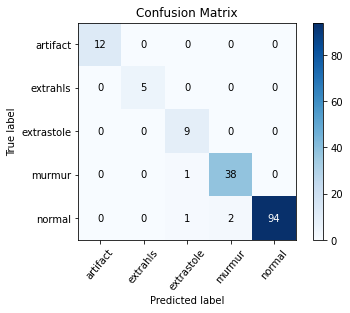

In [95]:
samplesPrediction(tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN2'))